In [ ]:
#check gpu model
from tensorflow.python.client import device_lib
device_lib.list_local_devices()[3]

name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11146783616
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16117089951118587478
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"

In [ ]:
!git clone https://github.com/rifat963/yolov3-wrapper-for-custom-data.git

Cloning into 'yolov3-wrapper-for-custom-data'...
remote: Enumerating objects: 107, done.
remote: Counting objects: 100% (107/107), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 107 (delta 38), reused 91 (delta 24), pack-reused 0
Receiving objects: 100% (107/107), 871.67 KiB | 27.24 MiB/s, done.
Resolving deltas: 100% (38/38), done.


In [ ]:
from IPython.display import clear_output
%cd /content/yolov3/data
!gdown --id 15F1j6k1pRka856N7dZz2MP1i0mv8IaOK
!unzip dhaka-traffic-yolo-v3.zip; rm dhaka-traffic-yolo-v3.zip;
clear_output()

In [ ]:
%cp '/content/yolov3/data/metadata/train.txt' /content/yolov3/
%cp '/content/yolov3/data/metadata/valid.txt' /content/yolov3/
%cp '/content/yolov3/data/metadata/test.txt' /content/yolov3/
%cp '/content/yolov3/data/metadata/traffic.names' /content/yolov3/
%cp '/content/yolov3/data/metadata/traffic.data' /content/yolov3/

In [ ]:
%cd /content/yolov3/data

/content/yolov3/data


In [ ]:
%cd /content/yolov3/data/train/images

/content/yolov3/data/train/images


In [ ]:
import glob
images_list = glob.glob("/content/yolov3/data/train/images/*.jpg")
with open("/content/yolov3/images.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
import glob
images_list = glob.glob("/content/yolov3/data/valid/images/*.jpg")
with open("/content/yolov3/image.txt", "w") as f:
    f.write("\n".join(images_list))

In [ ]:
%cat /content/yolov3/traffic.data

classes=21
train=train.txt
valid=valid.txt
names=traffic.names

In [ ]:
%%writefile /content/yolov3/traffic.data
classes=21
train=/content/yolov3/images.txt
valid=/content/yolov3/image.txt
names=/content/yolov3/traffic.names

Overwriting /content/yolov3/traffic.data


In [ ]:
#%cat images.txt

In [ ]:
!cp '/content/drive/My Drive/yolov3/competition/last.pt' /content/yolov3/weights

In [ ]:
%cd /content/yolov3

!python train.py --resume --cfg /content/yolov3/cfg/yolov3-spp-21cls.cfg \
                 --data traffic.data \
                 --epochs 400 \
                 --batch-size 8 \
                 --weights weights/last.pt \
                 --name yolov3-traffic

/content/yolov3
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=8, bucket='', cache_images=False, cfg='/content/yolov3/cfg/yolov3-spp-21cls.cfg', data='traffic.data', device='', epochs=400, evolve=False, freeze_layers=False, img_size=[320, 640], multi_scale=False, name='yolov3-traffic', nosave=False, notest=False, rect=False, resume=True, single_cls=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2020-11-08 12:35:41.491174: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
Optimizer groups: 76 .bias, 76 Conv2d.weight, 73 other
Reading image shapes: 100% 2400/2400 [00:00<00:00, 3553.25it/s] 
Caching labels train.txt (2400 found, 0 mis

In [ ]:
!cp '/content/drive/My Drive/yolov3/competition/test1.rar' /content/
!unrar x /content/test1.rar
clear_output()

In [ ]:
!python test.py --data traffic.data --cfg cfg/yolov3-spp-21cls.cfg --weights weights/best_yolov3-traffic.pt --img 1024 --augment

Namespace(augment=True, batch_size=16, cfg='cfg/yolov3-spp-21cls.cfg', conf_thres=0.001, data='traffic.data', device='', img_size=1024, iou_thres=0.6, save_json=False, single_cls=False, task='test', weights='weights/best_yolov3-traffic.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.26542e+07 parameters, 6.26542e+07 gradients
Caching labels valid.txt (600 found, 0 missing, 0 empty, 0 duplicate, for 600 images): 100% 600/600 [00:00<00:00, 2391.45it/s]
               Class    Images   Targets         P         R   mAP@0.5        F1:   0% 0/38 [00:00<?, ?it/s]/content/yolov3/utils/utils.py:512: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  i, j = (x[:, 5:] 

In [ ]:
from models import *  
from utils.datasets import *
from utils.utils import *

def detect(save_img=False):
    imgsz = opt.img_size 
    out, source, weights, half, view_img, save_txt = opt.output, opt.source, opt.weights, opt.half, opt.view_img, opt.save_txt

    # Initialize
    device = torch_utils.select_device(opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder

    # Initialize model
    model = Darknet(opt.cfg, imgsz)

    # Load weights
    attempt_download(weights)
    if weights.endswith('.pt'):  # pytorch format
        model.load_state_dict(torch.load(weights, map_location=device)['model'])
    else:  # darknet format
        load_darknet_weights(model, weights)

    
    # Eval mode
    model.to(device).eval()

    # Half precision
    half = half and device.type != 'cpu'  # half precision only supported on CUDA
    if half:
        model.half()

    # Set Dataloader
    vid_path, vid_writer = None, None
    save_img = True
    dataset = LoadImages(source, img_size=imgsz)

    # Get names and colors
    names = load_classes(opt.names)
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, imgsz, imgsz), device=device)  # init img
    _ = model(img.half() if half else img.float()) if device.type != 'cpu' else None  # run once

    results=[]
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = torch_utils.time_synchronized()
        pred = model(img, augment=opt.augment)[0]
        t2 = torch_utils.time_synchronized()

        # to float
        if half:
            pred = pred.float()

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres,
                                   multi_label=False, classes=opt.classes, agnostic=opt.agnostic_nms)

        
        # Process detections
        for i, det in enumerate(pred):  # detections for image i
            
            p, s, im0 = path, '', im0s          

            save_path = str(Path(out) / Path(p).name)
            #print(p)
            s += '%gx%g ' % img.shape[2:]  # print string
            #print(s)
            gn = torch.tensor(im0.shape)[[1, 0, 1, 0]]  #  normalization gain whwh
            if det is not None and len(det):
                # Rescale boxes from imgsz to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string

                xmin = []
                ymin = []
                xmax = []
                ymax = []
                scores = []
                labels_value=[]
                image_ids=[]
                # Write results
                for *xyxy, conf, cls in det:
                    if save_txt:  # Write to file
                        
                        conf_score = '%.2f' % (conf)
                        label_with_cls = '%s' % (names[int(cls)])
                        
                        labels_value.append(label_with_cls)
                        
                        xmin.append(int(xyxy[0]))
                        ymin.append(int(xyxy[1]))
                        xmax.append(int(xyxy[2]))
                        ymax.append(int(xyxy[3]))
                        
                        scores.append(conf_score)
                        image_ids.append(save_path)

                        xywh = (xyxy2xywh(torch.tensor(xyxy).view(1, 4)) / gn).view(-1).tolist()  # normalized xywh
                        with open(save_path[:save_path.rfind('.')] + '.txt', 'a') as file:
                            file.write(('%g ' * 5 + '\n') % (cls, *xywh))  # label format

                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)])

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))

            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)
        result = {
            'image_id': image_ids,
            'score': scores,
            'class': labels_value,
            'xmin': xmin,
            'ymin': ymin,
            'xmax': xmax,
            'ymax': ymax

            }

        results.append(result)

    if save_txt or save_img:
        print('Results saved to %s' % os.getcwd() + os.sep + out)

    print('Done. (%.3fs)' % (time.time() - t0))
    return results

In [ ]:
class opt:
    cfg='/content/yolov3/cfg/yolov3-spp-21cls.cfg'
    names='traffic.names'
    weights='weights/best_yolov3-traffic.pt'
    source='/content/yolov3/data/test'
    save_txt=True
    output='output'
    classes=False
    img_size=1024
    conf_thres=0.3
    iou_thres=0.6
    fourcc='mp4v'
    half=False
    device=''
    view_img=False
    agnostic_nms=False
    augment=False

In [ ]:
# predict results
with torch.no_grad():
    res=detect()

Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.2681e+07 parameters, 6.2681e+07 gradients
image 1/500 /content/yolov3/data/test/Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e8663.jpg: 1024x1024 1 buss, 2 cars, 1 minivans, 3 motorbikes, 2 pickups, Done. (0.098s)
image 2/500 /content/yolov3/data/test/Asraf_51_jpg.rf.0e3516baf7509bc2c4a4aa8deea494c2.jpg: 1024x1024 4 buss, 4 cars, 2 minivans, 3 motorbikes, 1 vans, Done. (0.093s)
image 3/500 /content/yolov3/data/test/Asraf_52_jpg.rf.867869f276e6db3a09a84b99643df316.jpg: 1024x1024 2 buss, 1 cars, 3 motorbikes, 1 pickups, Done. (0.091s)
image 4/500 /content/yolov3/data/test/Sabiha_(01)_jpg.rf.f935c7fc51a14c64e34c17a17c41cb1f.jpg: 1024x1024 1 cars, 2 pickups, 1 three wheelers (CNG)s, Done. (0.091s)
image 5/500 /content/yolov3/data/test/Sabiha_(10)_jpg.rf.d163e2a53d5ed22112e9ead62807acf4.jpg: 1024x1024 1 buss, 5 cars, 1 minivans, 1 pickups, 1 three wheelers (CNG)s, 1 vans, Done. (0.092

In [ ]:
import pandas as pd
import numpy as np

append_data=[]

for i in range(len(res)):
  
  df = pd.DataFrame(res[i], columns = ['image_id','class','score','xmin','ymin','xmax','ymax'])
 
  append_data.append(df)

finl_results=pd.concat(append_data)

finl_results.image_id = [x.strip('output/') for x in finl_results.image_id]

finl_results['width'] = 1024
finl_results['height'] = 1024
print(f'Number of Objects Detected: {finl_results.shape[0]}')

# Saving the submission file with timestamp
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d %H:%M:%S")

finl_results.to_csv(f'{timestamp} submission.csv', index=False)
print('Submission file is written Successfully!\n\n Sneak Peak at Submission File :)')

finl_results.head()

Number of Objects Detected: 2949
Submission file is written Successfully!

 Sneak Peak at Submission File :)


,image_id,class,score,xmin,ymin,xmax,ymax,width,height
0,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,pickup,0.95,642,566,776,802,1024,1024
1,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,pickup,0.92,778,527,1020,893,1024,1024
2,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,car,0.90,590,680,639,759,1024,1024
3,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,motorbike,0.90,462,682,486,768,1024,1024
4,Asraf_50_jpg.rf.7026694f0b9f37a6790982295c7e86...,minivan,0.90,533,670,577,741,1024,1024


In [ ]:
finl_results.to_csv('/content/submission.csv', index=False)

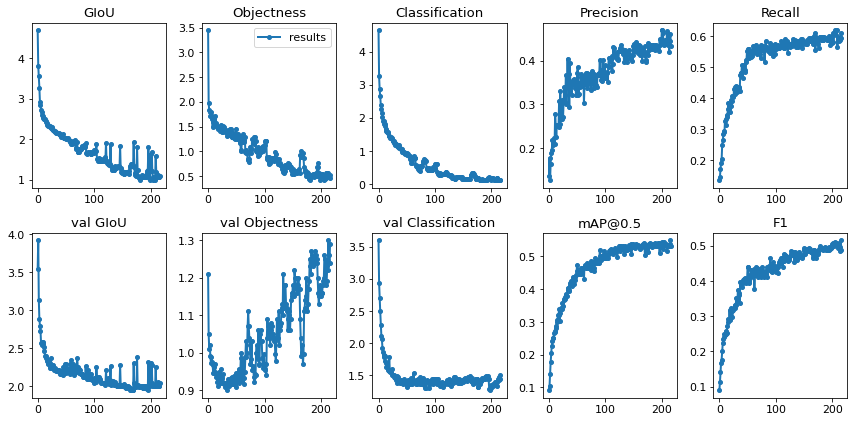

In [ ]:
from utils import utils; utils.plot_results()

In [ ]:
# thank you all